In [3]:
# import các thư viện cần thiết
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import warnings
warnings.filterwarnings('ignore') 

## Đọc dữ liệu

In [4]:
data = pd.read_csv('data.csv')
data.rename(columns={'0':'label'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, label to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [6]:
data.shape

(372450, 785)

In [7]:
data.head

<bound method NDFrame.head of         label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0           0    0    0    0    0    0    0    0    0    0  ...      0      0   
1           0    0    0    0    0    0    0    0    0    0  ...      0      0   
2           0    0    0    0    0    0    0    0    0    0  ...      0      0   
3           0    0    0    0    0    0    0    0    0    0  ...      0      0   
4           0    0    0    0    0    0    0    0    0    0  ...      0      0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445     25    0    0    0    0    0    0    0    0    0  ...      0      0   
372446     25    0    0    0    0    0    0    0    0    0  ...      0      0   
372447     25    0    0    0    0    0    0    0    0    0  ...      0      0   
372448     25    0    0    0    0    0    0    0    0    0  ...      0      0   
372449     25    0    0    0    0    0    0    0    0    0  ...      0      0  

In [8]:
X = data.drop('label',axis = 1)
y = data['label']
X = X / 255
X.isna().values.ravel().sum()

0

In [9]:
print(X.iloc[399].values)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Hiển thị dữ liệu

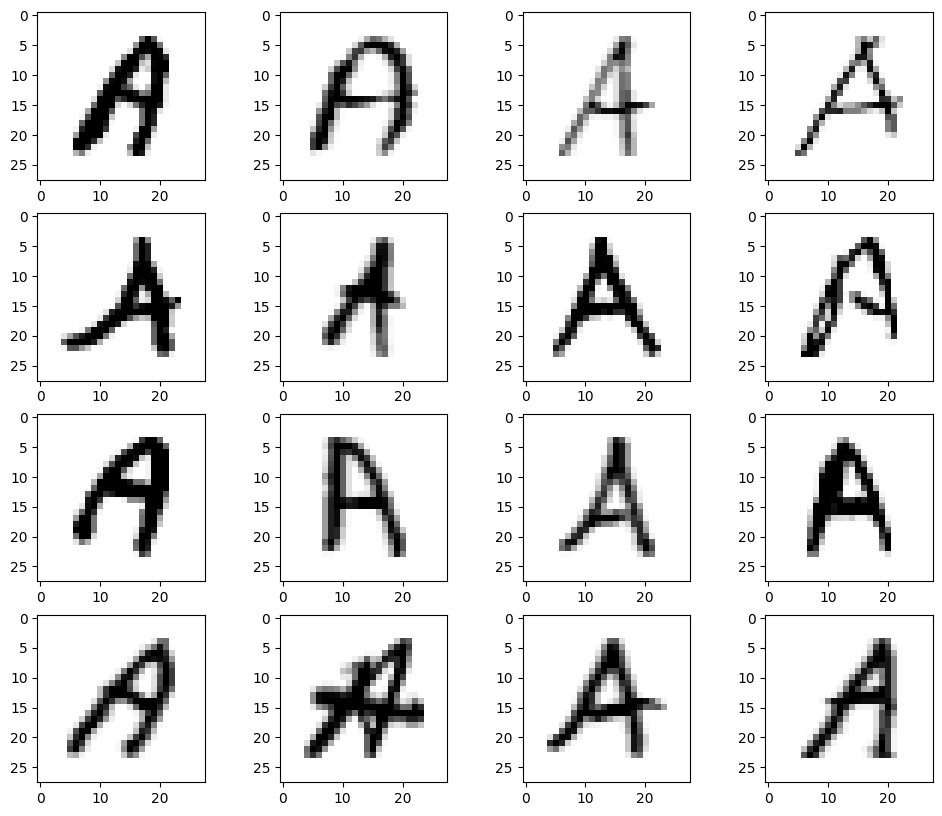

In [10]:
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Số lượng dữ liệu mỗi nhãn


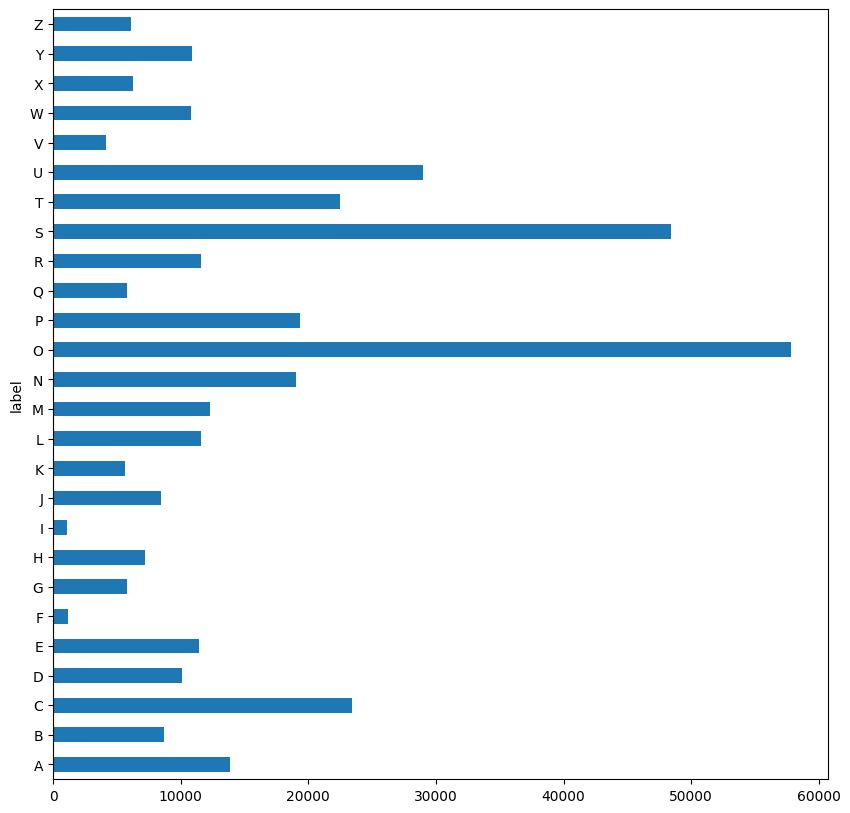

Số lượng ảnh chữ cái thấp nhất
I count: 1120
F count: 1163


In [11]:
print("Số lượng dữ liệu mỗi nhãn")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
df = data.copy()
df['label'] = data['label'].map(alphabets_mapper)

label_size = df.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("Số lượng ảnh chữ cái thấp nhất")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

## Huấn luyện mô hình

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='linear'))
model.add(keras.layers.Softmax())

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 26)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7244 - loss: 1.0561 - val_accuracy: 0.8997 - val_loss: 0.3754
Epoch 2/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9098 - loss: 0.3424 - val_accuracy: 0.9284 - val_loss: 0.2672
Epoch 3/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9346 - loss: 0.2500 - val_accuracy: 0.9431 - val_loss: 0.2109
Epoch 4/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9478 - loss: 0.1974 - val_accuracy: 0.9512 - val_loss: 0.1829
Epoch 5/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9563 - loss: 0.1668 - val_accuracy: 0.9565 - val_loss: 0.1592
Epoch 6/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9616 - loss: 0.1454 - val_accuracy: 0.9604 - val_loss: 0.1450
Epoch 7/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9650 - loss: 0.1326 - val_accuracy: 0.9627 - val_loss: 0.1355
Epoch 8/10
8148/8148 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9683 - loss: 0

In [15]:
model.save('model.h5')

In [16]:
letters =[chr(i) for i in range(65, 91)]
letters 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [17]:
y[y == 5].head()

67520    5
67521    5
67522    5
67523    5
67524    5
Name: label, dtype: int64

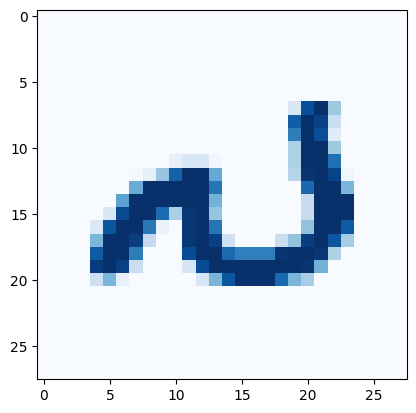

In [18]:
f_rand_idx = 123231
plt.imshow(X.iloc[f_rand_idx].values.reshape(28, 28), cmap='Blues')
plt.show()

In [19]:
pred_v = model.predict(np.array([X.iloc[f_rand_idx].values]))
print('Resposta: ', letters[np.argmax(pred_v)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Resposta:  N


### Thử nghiệm

In [1]:

from tensorflow import keras
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore') 

letters =[chr(i) for i in range(65, 91)]
letters 

model = keras.models.load_model('model.h5')

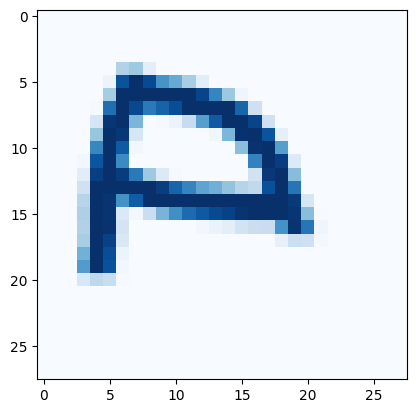

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Resposta:  A


In [47]:
import tkinter as tk
from PIL import Image,ImageOps
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2

lastx, lasty = 0, 0
line_width = 25


def xy(event):
    global lastx, lasty
    lastx, lasty = event.x, event.y

def addLine(event):
    global lastx, lasty
    canvas.create_line((lastx, lasty, event.x, event.y), width=line_width)
    lastx, lasty = event.x, event.y

def save_image():
    # save postscript image
    canvas.postscript(file='drawn_image.eps') 
    # use PIL to convert to PNG
    img = Image.open('drawn_image.eps') 
    img.save('drawn_image.png', 'png')
    img = img.convert('L')
    img = img.resize((28, 28))

    img = ImageOps.invert(img)

    img_data = np.asarray(img)
    # img = cv2.resize(img_data, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) 

    img_data = np.asarray(img)
    
    img_pre = img_data.reshape(1, 784)

    plt.imshow(img_pre.reshape(28, 28), cmap='Blues')
    # plt.imshow(img_data, cmap='Blues')

    plt.show()
    root.destroy()

    try:
        pred_v = model.predict(img_pre)
        print('Resposta: ', letters[np.argmax(pred_v)])
    except Exception as e:
        raise e
        
    

root = tk.Tk()
canvas = tk.Canvas(root, width=300, height=300)
canvas.pack()
canvas.bind("<Button-1>", xy)
canvas.bind("<B1-Motion>", addLine)
save_button = tk.Button(root, text="Save", command=save_image)
save_button.pack()
root.mainloop()